In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries loaded succesfully.")

Libraries loaded succesfully.


In [2]:
# Load the dataset
df = pd.read_csv('../data/raw/Titanic-Dataset.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset shape: (891, 12)

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Create a copy to preserve original data
df_processed = df.copy()

print(f"Original dataset: {df.shape}")
print(f"Processing dataset: {df_processed.shape}")
print(f"\nColumns: {list(df_processed.columns)}")

Original dataset: (891, 12)
Processing dataset: (891, 12)

Columns: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Title distribution:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

Title groups:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64


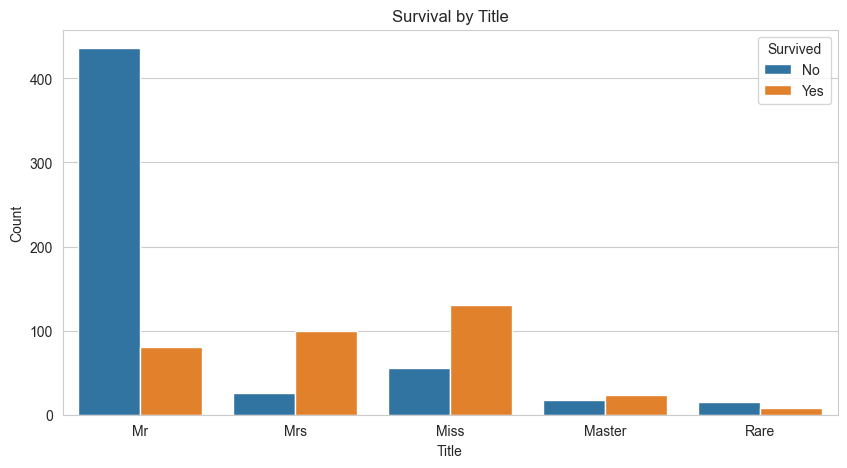


Survival rate by title:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64


In [4]:
# Extract title from Name column
df_processed['Title'] = df_processed['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Check titles
print("Title distribution:")
print(df_processed['Title'].value_counts())

# Group rare titles
title_mapping = {
    'Mr': 'Mr',
    'Miss': 'Miss',
    'Mrs': 'Mrs',
    'Master': 'Master',
    'Dr': 'Rare',
    'Rev': 'Rare',
    'Col': 'Rare',
    'Major': 'Rare',
    'Mlle': 'Miss',
    'Mme': 'Mrs',
    'Ms': 'Miss',
    'Lady': 'Rare',
    'Countess': 'Rare',
    'Capt': 'Rare',
    'Don': 'Rare',
    'Jonkheer': 'Rare',
    'Dona': 'Rare',
    'Sir': 'Rare',
    
}

df_processed['Title'] = df_processed['Title'].map(title_mapping)

print("\nTitle groups:")
print(df_processed['Title'].value_counts())

# Visualize survival by title
plt.figure(figsize=(10, 5))
sns.countplot(data=df_processed, x='Title', hue='Survived')
plt.title('Survival by Title')
plt.xlabel('Title')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

# Survival rate by title
print("\nSurvival rate by title:")
print(df_processed.groupby('Title')['Survived'].mean().sort_values(ascending=False))

Family Size distribution:
FamilySize
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
Name: count, dtype: int64

Family Size Category distribution:
FamilySizeCategory
Alone     537
Small     263
Medium     66
Large      25
Name: count, dtype: int64


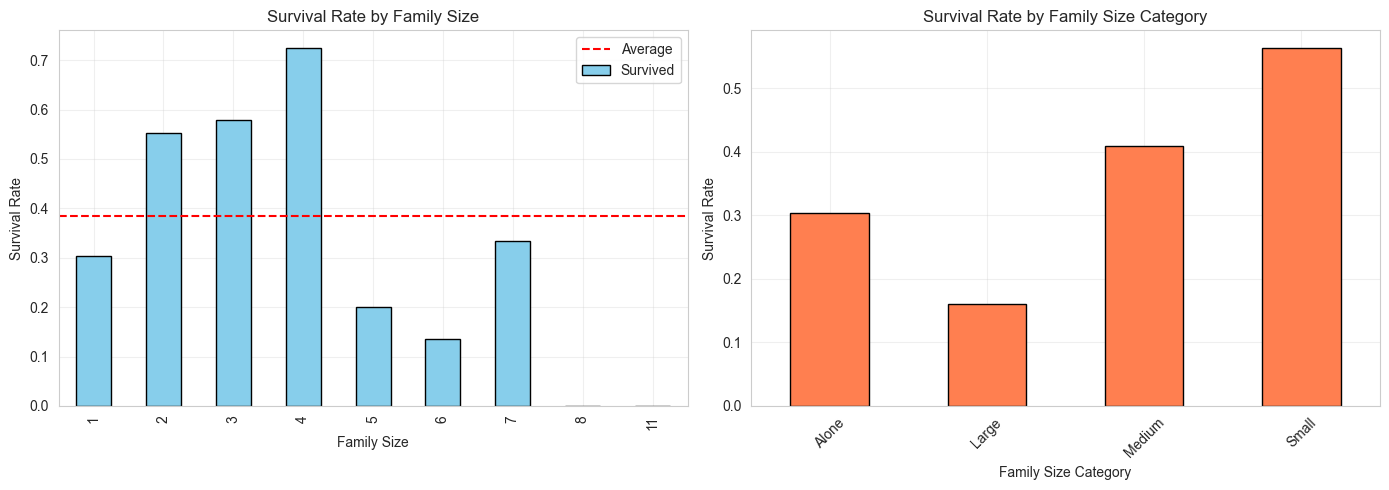


Family features created: FamilySize, IsAlone, FamilySizeCategory


In [5]:
# Create FamilySize feature
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1

# Create IsAlone feature
df_processed['IsAlone'] = (df_processed['FamilySize'] == 1).astype(int)

# Create FamilySize category
def categorize_family(size):
    if size == 1:
        return 'Alone'
    elif size <= 3:
        return 'Small'
    elif size <= 6:
        return 'Medium'
    else:
        return 'Large'

df_processed['FamilySizeCategory'] = df_processed['FamilySize'].apply(categorize_family)

print("Family Size distribution:")
print(df_processed['FamilySize'].value_counts().sort_index())

print("\nFamily Size Category distribution:")
print(df_processed['FamilySizeCategory'].value_counts())

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_processed.groupby('FamilySize')['Survived'].mean().plot(kind='bar', ax=axes[0], 
                                                             color='skyblue', edgecolor='black')
axes[0].set_title('Survival Rate by Family Size')
axes[0].set_xlabel('Family Size')
axes[0].set_ylabel('Survival Rate')
axes[0].axhline(y=df_processed['Survived'].mean(), color='r', linestyle='--', label='Average')
axes[0].legend()
axes[0].grid(alpha=0.3)

df_processed.groupby('FamilySizeCategory')['Survived'].mean().plot(kind='bar', ax=axes[1], 
                                                                     color='coral', edgecolor='black')
axes[1].set_title('Survival Rate by Family Size Category')
axes[1].set_xlabel('Family Size Category')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFamily features created: FamilySize, IsAlone, FamilySizeCategory")

In [6]:
# Check missing values
print("Missing values before processing:")
missing_before = df_processed.isnull().sum()
missing_pct = (missing_before / len(df_processed) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_before,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\n" + "="*60)
print(f"We need to handle: {missing_df[missing_df['Missing Count']>0].index.tolist()}")
print("="*60)

Missing values before processing:
          Missing Count  Percentage
Cabin               687       77.10
Age                 177       19.87
Embarked              2        0.22

We need to handle: ['Age', 'Cabin', 'Embarked']


HasCabin distribution:
HasCabin
0    687
1    204
Name: count, dtype: int64

Survival rate by HasCabin:
HasCabin
0    0.299854
1    0.666667
Name: Survived, dtype: float64


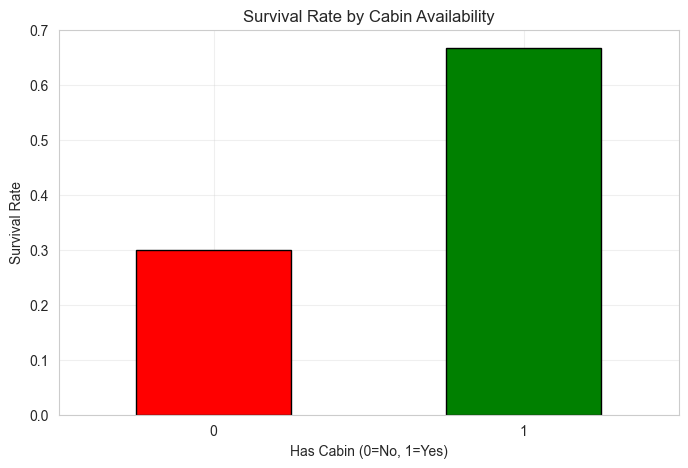


HasCabin feature created.


In [7]:
# Cabin: Most values are missing (77%), so create a binary feature
df_processed['HasCabin'] = df_processed['Cabin'].notna().astype(int)

print("HasCabin distribution:")
print(df_processed['HasCabin'].value_counts())

print("\nSurvival rate by HasCabin:")
print(df_processed.groupby('HasCabin')['Survived'].mean())

# Visualize
plt.figure(figsize=(8, 5))
df_processed.groupby('HasCabin')['Survived'].mean().plot(kind='bar', color=['red', 'green'], edgecolor='black')

plt.title('Survival Rate by Cabin Availability')
plt.xlabel('Has Cabin (0=No, 1=Yes)')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.grid(alpha=0.3)
plt.show()

print("\nHasCabin feature created.")

In [8]:
# Embarked: Only 2 missing values, fill with mode
print(f"Embarked missing: {df_processed['Embarked'].isnull().sum()}")

# Fill with mode (most common value)
mode_embarked = df_processed['Embarked'].mode()[0]
df_processed['Embarked'].fillna(mode_embarked, inplace=True)

print(f"Embarked filled with mode: {mode_embarked}")
print(f"Embarked missing after: {df_processed['Embarked'].isnull().sum()}")

Embarked missing: 2
Embarked filled with mode: S
Embarked missing after: 0


Age missing before: 177

Median age by Title and Pclass:
Title   Pclass
Master  1          4.0
        2          1.0
        3          4.0
Miss    1         30.0
        2         24.0
        3         18.0
Mr      1         40.0
        2         31.0
        3         26.0
Mrs     1         40.0
        2         32.0
        3         31.0
Rare    1         48.5
        2         46.5
Name: Age, dtype: float64

Age missing after: 0


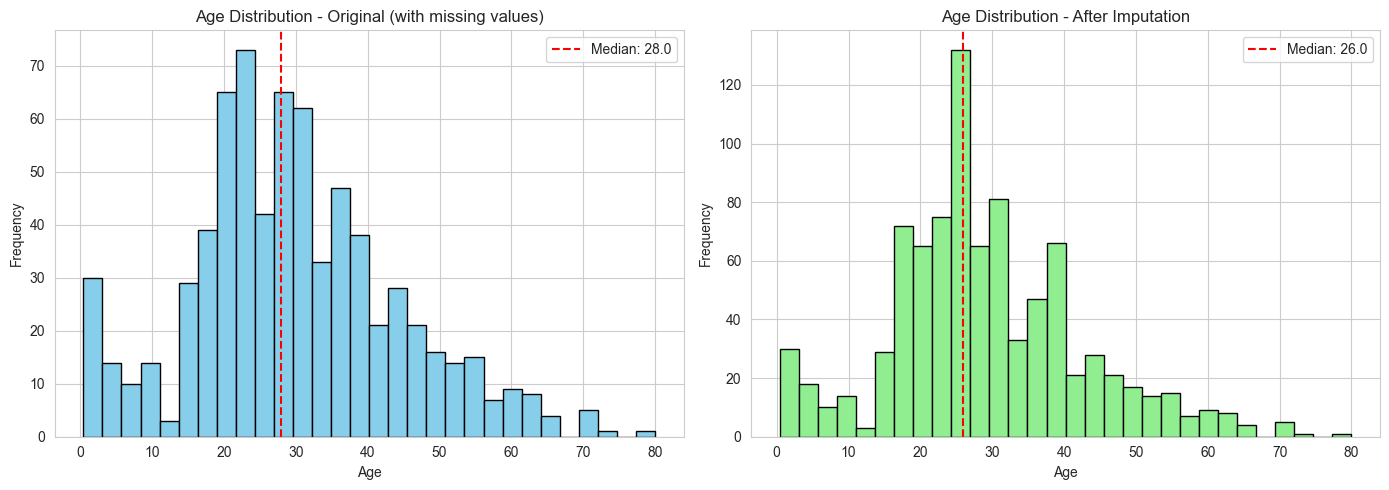

In [9]:
# Age: 177 missing (19.87% - Use median age by Title and Pclass)
print(f"Age missing before: {df_processed['Age'].isnull().sum()}")

# Check median age by Title and Pclass
age_by_title_pclass = df_processed.groupby(['Title', 'Pclass'])['Age'].median()
print("\nMedian age by Title and Pclass:")
print(age_by_title_pclass)

# Fill missing ages
def fill_age(row):
    if pd.isna(row['Age']):
        # Try to get median age for this Title and Pclass combination
        try:
            return age_by_title_pclass.loc[row['Title'], row['Pclass']]
        except:
            # If combination doesn't exist, use median age for Title only
            return df_processed[df_processed['Title'] == row['Title']]['Age'].median()
    return row['Age']

df_processed['Age'] = df_processed.apply(fill_age, axis=1)

print(f"\nAge missing after: {df_processed['Age'].isnull().sum()}")

# Visualize age distribution before/after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Original age distribution
df['Age'].hist(bins=30, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution - Original (with missing values)')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['Age'].median(), color='r', linestyle='--', label=f'Median: {df["Age"].median():.1f}')
axes[0].legend()

# Processed age distribution
df_processed['Age'].hist(bins=30, ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Age Distribution - After Imputation')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].axvline(df_processed['Age'].median(), color='r', linestyle='--', label=f'Median: {df_processed["Age"].median():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

In [10]:
# Create age bins
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'MiddleAge', 'Senior'])

print("Age Group distribution:")
print(df_processed['AgeGroup'].value_counts().sort_index())

print("\nSurvival rate by Age Group:")
print(df_processed.groupby('AgeGroup')['Survived'].mean())

print("AgeGroup feature created.")

Age Group distribution:
AgeGroup
Child         73
Teen         103
Adult        469
MiddleAge    224
Senior        22
Name: count, dtype: int64

Survival rate by Age Group:
AgeGroup
Child        0.575342
Teen         0.475728
Adult        0.330490
MiddleAge    0.406250
Senior       0.227273
Name: Survived, dtype: float64
AgeGroup feature created.


In [11]:
# Final check for missing values
print("Missing values after preprocessing:")
missing_after = df_processed.isnull().sum()
print(missing_after[missing_after > 0])

if missing_after.sum() == 0:
    print("\nSuccess: No missing values remaining.")
else:
    print(f"Still have {missing_after.sum()} missing values to handle.")

Missing values after preprocessing:
Cabin    687
dtype: int64
Still have 687 missing values to handle.


In [12]:
# Columns to drop
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

print(f"Columns before drop: {df_processed.shape[1]}")
print(f"Dropping: {columns_to_drop}")

df_processed = df_processed.drop(columns=columns_to_drop)

print(f"\nColumns after drop:{df_processed.shape[1]}")
print(f"\nRemaining columns:")
print(list(df_processed.columns))

Columns before drop: 18
Dropping: ['PassengerId', 'Name', 'Ticket', 'Cabin']

Columns after drop:14

Remaining columns:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'FamilySizeCategory', 'HasCabin', 'AgeGroup']


In [13]:
# Check the processed dataset
print("="*60)
print("             PREPROCESSED DATASET SUMMARY")
print("="*60)

print(f"\nShape: {df_processed.shape}")
print(f"\nColumns: {list(df_processed.columns)}")

print(f"\nMissing values:")
print(df_processed.isnull().sum().sum())

print(f"\nData types:")
print(df_processed.dtypes.value_counts())

print(f"\nFirst 5 rows:")
df_processed.head()

             PREPROCESSED DATASET SUMMARY

Shape: (891, 14)

Columns: ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'FamilySizeCategory', 'HasCabin', 'AgeGroup']

Missing values:
0

Data types:
int64       5
object      4
float64     2
int32       2
category    1
Name: count, dtype: int64

First 5 rows:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,FamilySizeCategory,HasCabin,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0,Small,0,Adult
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0,Small,1,MiddleAge
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1,Alone,0,Adult
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0,Small,1,Adult
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1,Alone,0,Adult


In [14]:
# Seperate features by type
print("Current data types:")
print(df_processed.dtypes)

print("\n" + "="*60)
print("CATEGORICAL FEATURES (need encoding):")
categorical_features = df_processed.select_dtypes(include=['object', 'category']).columns.tolist()
print(categorical_features)

print("\nNUMERICAL FEATURES (already numeric):")
numerical_features = df_processed.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove target variable from numerical features
if 'Survived' in numerical_features:
    numerical_features.remove('Survived')
print(numerical_features)

Current data types:
Survived                 int64
Pclass                   int64
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Fare                   float64
Embarked                object
Title                   object
FamilySize               int64
IsAlone                  int32
FamilySizeCategory      object
HasCabin                 int32
AgeGroup              category
dtype: object

CATEGORICAL FEATURES (need encoding):
['Sex', 'Embarked', 'Title', 'FamilySizeCategory', 'AgeGroup']

NUMERICAL FEATURES (already numeric):
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']


In [15]:
# Sex: Binary encoding (0 = male, 1 = female)
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
df_processed['Sex'] = le_sex.fit_transform(df_processed['Sex'])

print("Sex encoding:")
print("0 = male, 1 = female")
print(f"\nSex distribution after encoding:")
print(df_processed['Sex'].value_counts())

print("\nSex encoded.")
# Title: Label encoding
le_title = LabelEncoder()
df_processed['Title'] = le_title.fit_transform(df_processed['Title'])

print("Title encoding:")
tite_mapping = dict(zip(le_title.classes_, le_title.transform(le_title.classes_)))
print(title_mapping)

print(f"\nTitle distribution after encoding:")
print(df_processed['Title'].value_counts())

print("\nTitle encoded.")

Sex encoding:
0 = male, 1 = female

Sex distribution after encoding:
Sex
1    577
0    314
Name: count, dtype: int64

Sex encoded.
Title encoding:
{'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master', 'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare', 'Mlle': 'Miss', 'Mme': 'Mrs', 'Ms': 'Miss', 'Lady': 'Rare', 'Countess': 'Rare', 'Capt': 'Rare', 'Don': 'Rare', 'Jonkheer': 'Rare', 'Dona': 'Rare', 'Sir': 'Rare'}

Title distribution after encoding:
Title
2    517
1    185
3    126
0     40
4     23
Name: count, dtype: int64

Title encoded.


In [16]:
# Embarked: One-Hot encoding (creates binary columns)
embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked', drop_first=True)

print("Embarked One-Hot Encoding:")
print(f"Original column: {df_processed['Embarked'].unique()}")
print(f"New columns: {embarked_dummies.columns.tolist()}")

# Add to dataframe
df_processed = pd.concat([df_processed, embarked_dummies], axis=1)

# Drop original Embarked column
df_processed = df_processed.drop('Embarked', axis=1)

print(f"\nEmbarked encoded and original column dropped.")
print(f"\nNew shape: {df_processed.shape}")

Embarked One-Hot Encoding:
Original column: ['S' 'C' 'Q']
New columns: ['Embarked_Q', 'Embarked_S']

Embarked encoded and original column dropped.

New shape: (891, 15)


In [17]:
# FamilySizeCategory: One-Hot encoding
family_dummies = pd.get_dummies(df_processed['FamilySizeCategory'], prefix='Family', drop_first=True)

print("FamilySizeCategory One-Hot Encoding:")
print(f"Original categories: {df_processed['FamilySizeCategory'].unique()}")
print(f"New columns: {family_dummies.columns.tolist()}")

# Add to dataframe
df_processed = pd.concat([df_processed, family_dummies], axis=1)

# Drop original FamilySizeCategory column
df_processed = df_processed.drop('FamilySizeCategory', axis=1)

print(f"\nFamilySizeCategory encoded and original column dropped.")
print(f"New shape: {df_processed.shape}")

FamilySizeCategory One-Hot Encoding:
Original categories: ['Small' 'Alone' 'Medium' 'Large']
New columns: ['Family_Large', 'Family_Medium', 'Family_Small']

FamilySizeCategory encoded and original column dropped.
New shape: (891, 17)


In [18]:
age_dummies = pd.get_dummies(df_processed['AgeGroup'], prefix='AgeGroup', drop_first=True)

print("AgeGroup One-Hot Encoding:")
print(f"Original categories: {df_processed['AgeGroup'].unique()}")
print(f"New columns: {age_dummies.columns.tolist()}")

# Add to dataframe
df_processed = pd.concat([df_processed, age_dummies], axis=1)

# Drop original AgeGroup column
df_processed = df_processed.drop('AgeGroup', axis=1)

print(f"\nAgeGroup encoded and original column dropped.")
print(f"New shape: {df_processed.shape}")

AgeGroup One-Hot Encoding:
Original categories: ['Adult', 'MiddleAge', 'Child', 'Teen', 'Senior']
Categories (5, object): ['Child' < 'Teen' < 'Adult' < 'MiddleAge' < 'Senior']
New columns: ['AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_MiddleAge', 'AgeGroup_Senior']

AgeGroup encoded and original column dropped.
New shape: (891, 20)


In [19]:
# Check final dataset
print("="*60)
print("         FINAL ENCODED DATASET")
print("="*60)

print(f"\nShape: {df_processed.shape}")

print(f"\nData types:")
print(df_processed.dtypes.value_counts())

print(f"\nAll columns:")
print(df_processed.columns.tolist())

print(f"\nMissing values: {df_processed.isnull().sum().sum()}")

print(f"\nFirst 5 rows:")
df_processed.head()

         FINAL ENCODED DATASET

Shape: (891, 20)

Data types:
bool       9
int64      5
int32      4
float64    2
Name: count, dtype: int64

All columns:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'IsAlone', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'Family_Large', 'Family_Medium', 'Family_Small', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_MiddleAge', 'AgeGroup_Senior']

Missing values: 0

First 5 rows:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title,FamilySize,IsAlone,HasCabin,Embarked_Q,Embarked_S,Family_Large,Family_Medium,Family_Small,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_MiddleAge,AgeGroup_Senior
0,0,3,1,22.0,1,0,7.2500,2,2,0,0,False,True,False,False,True,False,True,False,False
1,1,1,0,38.0,1,0,71.2833,3,2,0,1,False,False,False,False,True,False,False,True,False
2,1,3,0,26.0,0,0,7.9250,1,1,1,0,False,True,False,False,False,False,True,False,False
3,1,1,0,35.0,1,0,53.1000,3,2,0,1,False,True,False,False,True,False,True,False,False
4,0,3,1,35.0,0,0,8.0500,2,1,1,0,False,True,False,False,False,False,True,False,False


In [21]:
# Seperate features (X) and target (y)
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

print(f"\nFeatures columns ({len(X.columns)}):")
print(X.columns.tolist())

print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nSurvival rate: {y.mean():.2%}")

Features (X) shape: (891, 19)
Target (y) shape: (891,)

Features columns (19):
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title', 'FamilySize', 'IsAlone', 'HasCabin', 'Embarked_Q', 'Embarked_S', 'Family_Large', 'Family_Medium', 'Family_Small', 'AgeGroup_Teen', 'AgeGroup_Adult', 'AgeGroup_MiddleAge', 'AgeGroup_Senior']

Target distribution:
Survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 38.38%


In [23]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
# stratify=y ensures same survival ratio in train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train/Test Split Results:")
print("="*60)
print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nTraining survival rate: {y_train.mean():.2%}")
print(f"Test survival rate: {y_test.mean():.2%}")

print(f"\nData split successfully.")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

Train/Test Split Results:
Training set: 712 samples (79.9%)
Test set: 179 samples (20.1%)

Training survival rate: 38.34%
Test survival rate: 38.55%

Data split successfully.
X_train: (712, 19)
X_test: (179, 19)
y_train: (712,)
y_test: (179,)


In [25]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to dataframe (to keep column names)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature Scaling complete.")
print("="*60)

print(f"\nX_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

print(f"\nBefore scaling (X_train first row):")
print(X_train.iloc[0])

print(f"\nBefore scaling (X_train_scaled first row):")
print(X_train_scaled.iloc[0])

print("\nFeatures scaled using StandarScaler.")

Feature Scaling complete.

X_train_scaled shape: (712, 19)
X_test_scaled shape: (179, 19)

Before scaling (X_train first row):
Pclass                      3
Sex                         1
Age                      26.0
SibSp                       0
Parch                       0
Fare                  56.4958
Title                       2
FamilySize                  1
IsAlone                     1
HasCabin                    0
Embarked_Q              False
Embarked_S               True
Family_Large            False
Family_Medium           False
Family_Small            False
AgeGroup_Teen           False
AgeGroup_Adult           True
AgeGroup_MiddleAge      False
AgeGroup_Senior         False
Name: 692, dtype: object

Before scaling (X_train_scaled first row):
Pclass                0.829568
Sex                   0.742427
Age                  -0.245968
SibSp                -0.465084
Parch                -0.466183
Fare                  0.513812
Title                 0.112376
FamilySize       

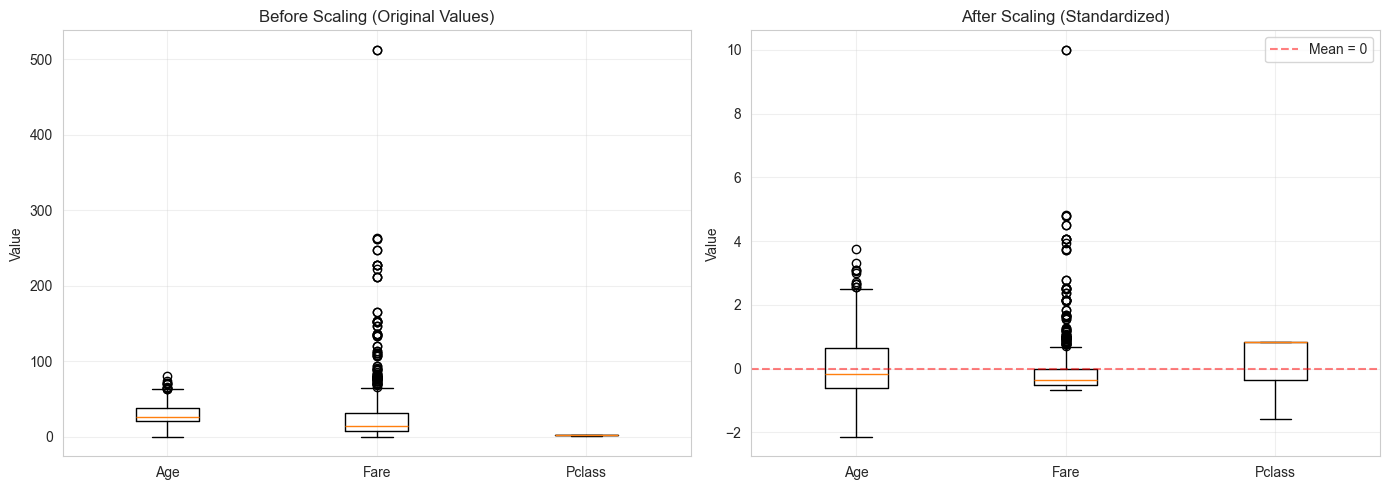

Statistics Before Scaling:
          Age    Fare  Pclass
count  712.00  712.00  712.00
mean    29.32   31.82    2.31
std     13.50   48.06    0.83
min      0.42    0.00    1.00
25%     21.00    7.90    2.00
50%     27.00   14.45    3.00
75%     38.00   31.00    3.00
max     80.00  512.33    3.00

Statistics After Scaling (mean≈0, std≈1):
          Age    Fare  Pclass
count  712.00  712.00  712.00
mean     0.00   -0.00   -0.00
std      1.00    1.00    1.00
min     -2.14   -0.66   -1.57
25%     -0.62   -0.50   -0.37
50%     -0.17   -0.36    0.83
75%      0.64   -0.02    0.83
max      3.76   10.01    0.83


In [27]:
# Better visualization: Show before/after for numerical features only
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Select key numerical features
numerical_cols = ['Age', 'Fare', 'Pclass']

# Before Scaling
axes[0].boxplot([X_train[col] for col in numerical_cols], labels=numerical_cols)
axes[0].set_title('Before Scaling (Original Values)')
axes[0].set_ylabel('Value')
axes[0].grid(alpha=0.3)

# After Scaling
axes[1].boxplot([X_train_scaled[col] for col in numerical_cols], labels=numerical_cols)
axes[1].set_title('After Scaling (Standardized)')
axes[1].set_ylabel('Value')
axes[1].axhline(y=0, color='r', linestyle='--', alpha=0.5, label='Mean = 0')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Show statistics
print("Statistics Before Scaling:")
print(X_train[numerical_cols].describe().round(2))

print("\n" + "="*60)
print("Statistics After Scaling (mean≈0, std≈1):")
print(X_train_scaled[numerical_cols].describe().round(2))

In [28]:
# Save Processed data for future use
import pickle

# Create processed data folder if doesn't exist
import os
os.makedirs('../data/processed', exist_ok=True)

# Save train and test sets
X_train_scaled.to_csv('../data/processed/X_train.csv', index=False)
X_test_scaled.to_csv('../data/processed/X_test.csv', index=False)
y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

# Save the scaler
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Processed data saved:")
print("   - X_train.csv")
print("   - X_test.csv")
print("   - y_train.csv")
print("   - y_test.csv")
print("   - scaler.pkl")

Processed data saved:
   - X_train.csv
   - X_test.csv
   - y_train.csv
   - y_test.csv
   - scaler.pkl


In [31]:
print("="*60)
print("     PREPROCESSING COMPLETED - SUMMARY")
print("="*60)

print("\nCOMPLETED STEPS:")
print("   1. Feature Engineering")
print("      - Title extraction from Name")
print("      - FamilySize, IsAlone features")
print("      - HasCabin feature")
print("      - AgeGroup binning")
print("   2. Missing Value Handling")
print("      - Age: Imputed by Title & Pclass")
print("      - Cabin: Converted to HasCabin binary")
print("      - Embarked: Filled with mode")
print("   3. Encoding")
print("      - Sex: Label encoding")
print("      - Title: Label encoding")
print("      - Embarked: One-Hot encoding")
print("      - FamilySizeCategory: One-Hot encoding")
print("      - AgeGroup: One-Hot encoding")
print("   4. Train/Test Split")
print(f"      - Training: {len(X_train)} samples (80%)")
print(f"      - Test: {len(X_test)} samples (20%)")
print("   5. Feature Scaling")
print("      - StandardScaler (mean=0, std=1)")

print(f"\nFINAL DATASET:")
print(f"   - Features: {X_train.shape[1]}")
print(f"   - Training samples: {X_train.shape[0]}")
print(f"   - Test samples: {X_test.shape[0]}")
print(f"   - All missing values handled.")
print(f"   - All features numeric.")
print(f"   - Ready for modeling.")

     PREPROCESSING COMPLETED - SUMMARY

COMPLETED STEPS:
   1. Feature Engineering
      - Title extraction from Name
      - FamilySize, IsAlone features
      - HasCabin feature
      - AgeGroup binning
   2. Missing Value Handling
      - Age: Imputed by Title & Pclass
      - Cabin: Converted to HasCabin binary
      - Embarked: Filled with mode
   3. Encoding
      - Sex: Label encoding
      - Title: Label encoding
      - Embarked: One-Hot encoding
      - FamilySizeCategory: One-Hot encoding
      - AgeGroup: One-Hot encoding
   4. Train/Test Split
      - Training: 712 samples (80%)
      - Test: 179 samples (20%)
   5. Feature Scaling
      - StandardScaler (mean=0, std=1)

FINAL DATASET:
   - Features: 19
   - Training samples: 712
   - Test samples: 179
   - All missing values handled.
   - All features numeric.
   - Ready for modeling.
